In [1]:
import tensorflow 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(train_X,train_Y),(test_X,test_Y)=mnist.load_data()
train_X=train_X[:1000]
train_Y=train_Y[:1000]
test_X=test_X[:200]
test_Y=test_Y[:200]

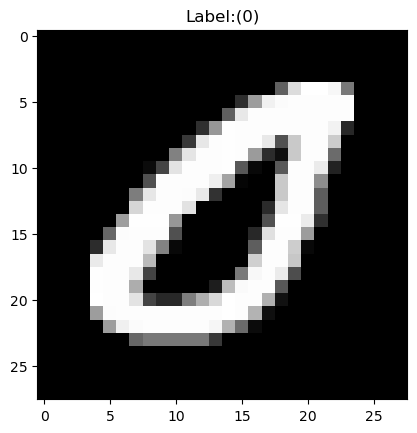

In [9]:
i=np.random.randint(0,1000)
plt.imshow(train_X[i],cmap='gray')
plt.title(f"Label:({train_Y[i]})")
plt.show()

In [11]:
train_x=train_X.reshape(1000,28,28,1).astype('float32')/255
test_x=test_X.reshape(-1,28,28,1).astype('float32')/255
train_Y=to_categorical(train_Y,10)
test_Y=to_categorical(test_Y,10)


In [13]:
model = Sequential([
    Conv2D(4, (3,3), activation = 'relu', input_shape = (28, 28, 1)), 
    MaxPooling2D((2, 2)),
    Conv2D(4, (3,3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ])
model.summary()

C:\Users\K Jyothsna\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 4)           │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 4)           │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           3,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,750 (14.65 KB)

 Trainable params: 3,750 (14.65 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_X,train_Y,validation_split=0.2,epochs=10,batch_size=4)
loss,accuracy=model.evaluate(test_X,test_Y)
print(f"accuracy :{accuracy*100:.2f}")

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1696 - loss: 30.1034 - val_accuracy: 0.3250 - val_loss: 5.9733
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4615 - loss: 3.5888 - val_accuracy: 0.4300 - val_loss: 3.2992
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5756 - loss: 2.0797 - val_accuracy: 0.4900 - val_loss: 2.5251
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6222 - loss: 1.4246 - val_accuracy: 0.5350 - val_loss: 2.2089
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6851 - loss: 1.1624 - val_accuracy: 0.5900 - val_loss: 1.8256
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7775 - loss: 0.7779 - val_accuracy: 0.5700 - val_loss: 1.7775
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7958 - loss: 0.6159 - val_accuracy: 0.6300 - val_loss: 1.6603
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8630 - loss: 0.4381 - val_accuracy: 